In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('LoanDataset_test.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [3]:
test =pd.read_csv('LoanDatasets.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_orginal = train.copy()
test_orginal = test.copy()


In [5]:
train.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
test.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [8]:
train.shape

(367, 12)

In [9]:
test.shape

(631, 13)

In [10]:
test['Loan_Status'].value_counts()

Y    435
N    196
Name: Loan_Status, dtype: int64

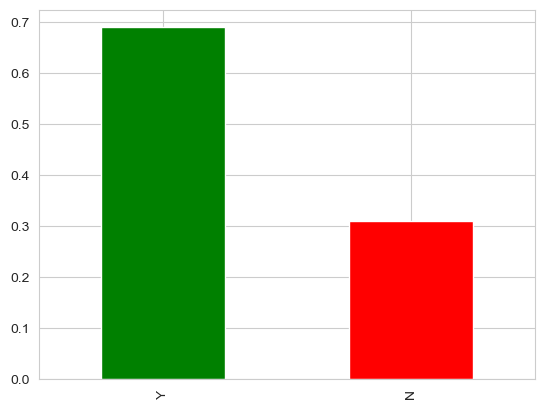

In [11]:

test['Loan_Status'].value_counts(normalize=True).plot.bar( color=("green", "red"))

plt.show()

In [12]:
#lets devide the data into different types of variables are Categorical, ordinal, and numerical.
#Categorical features:Gender, Married, Self_Employed, Credit_History, Loan_Status
#Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)
#Numerical features: These features have numerical values (ApplicantIncome, Co-applicantIncome, LoanAmount, Loan_Amount_Term)


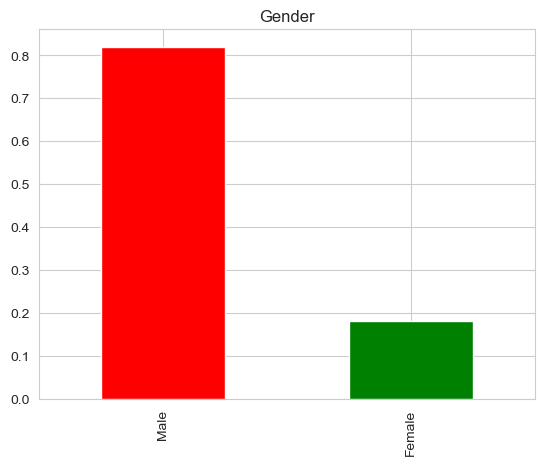

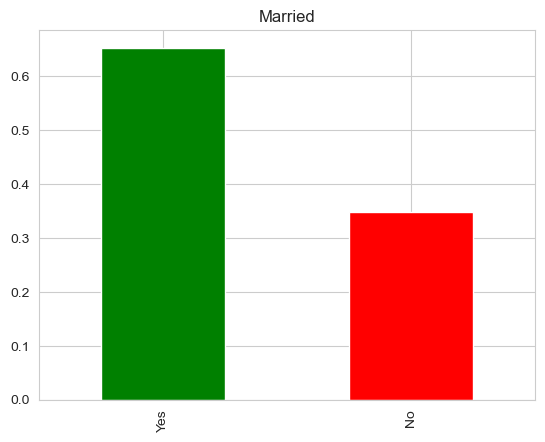

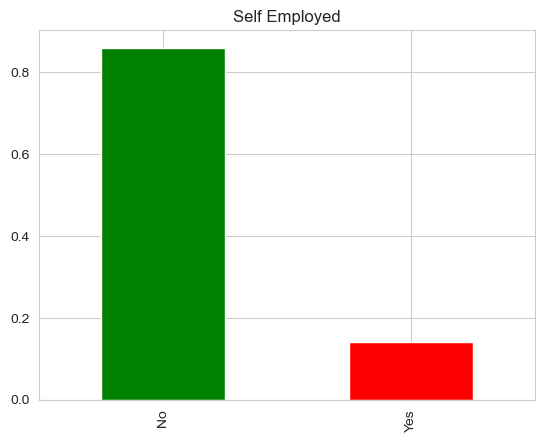

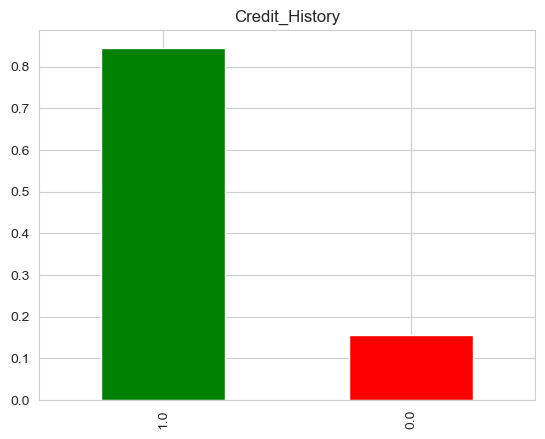

In [13]:
#Independent Variable (Categorical)
test['Gender'].value_counts(normalize=True).plot.bar( title='Gender', color=("red", "green"))
plt.show()
test['Married'].value_counts(normalize=True).plot.bar(title='Married', color=("green", "red"))
plt.show()
test['Self_Employed'].value_counts(normalize=True).plot.bar(title="Self Employed", color=("green", "red"))
plt.show()
test['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History', color=("green", "red"))
plt.show()

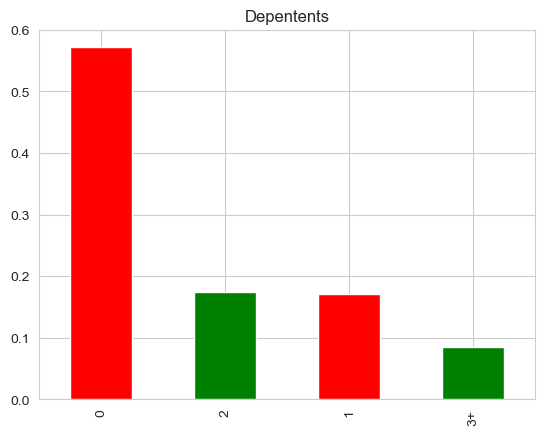

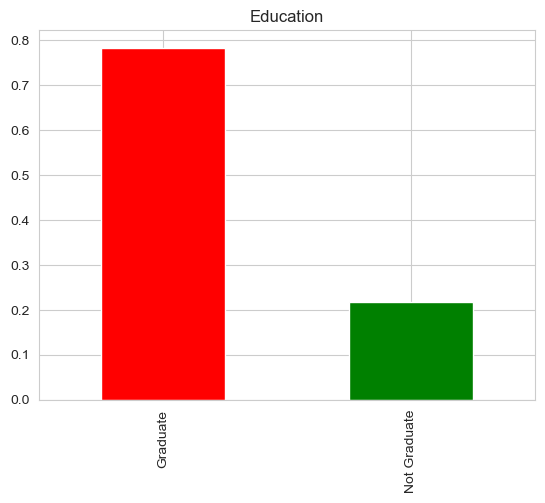

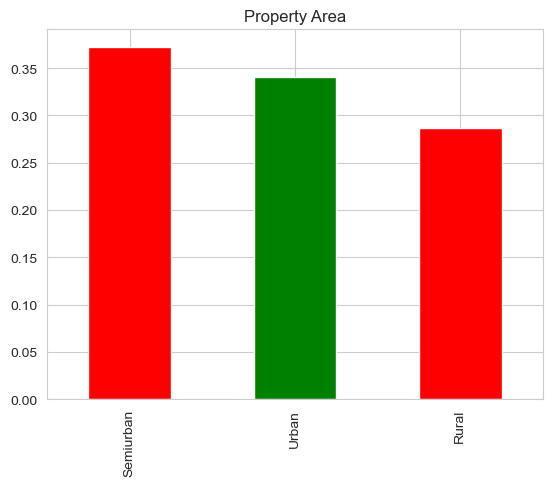

In [14]:
#Independent Variable (Ordinal)
test['Dependents'].value_counts(normalize=True).plot.bar(title='Depentents', color=("red", "green"))
plt.show()
test['Education'].value_counts(normalize=True).plot.bar(title="Education", color=('red', 'green'))
plt.show()
test['Property_Area'].value_counts(normalize=True).plot.bar(title='Property Area', color=('red', 'green'))
plt.show()

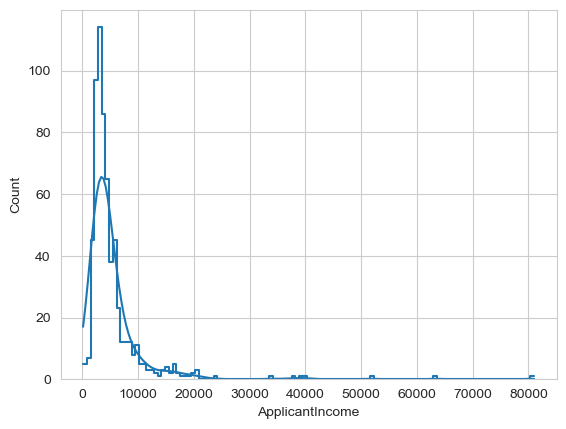

In [15]:
sns.histplot(test['ApplicantIncome'], kde=True, fill=False, element="step")
plt.show()


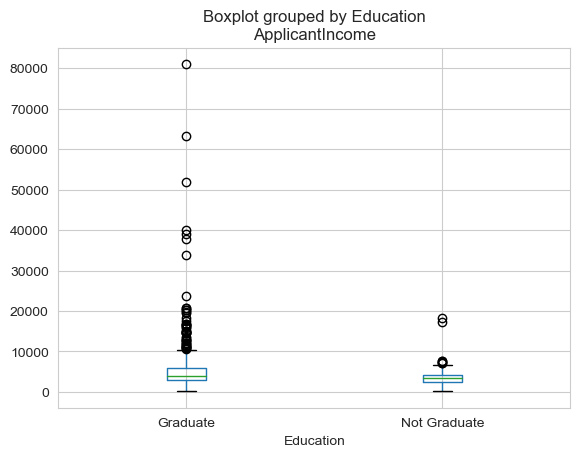

In [16]:
test.boxplot(column='ApplicantIncome', by ='Education')
plt.show()

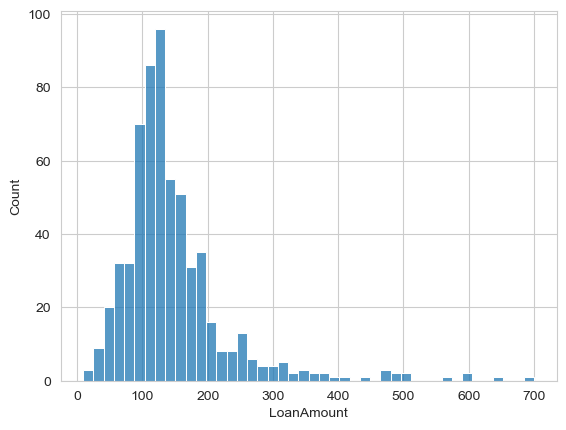

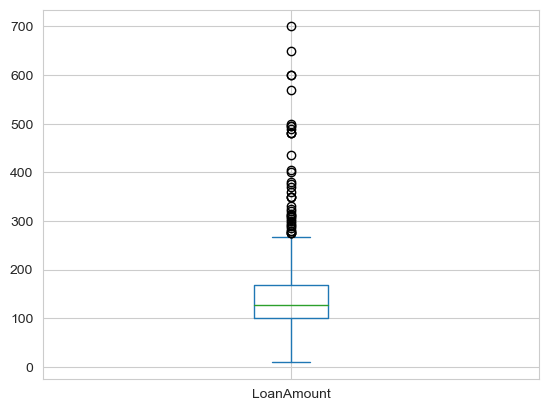

In [17]:
test.notna()
sns.histplot(test['LoanAmount'])
plt.show()
test["LoanAmount"].plot.box()
plt.show()

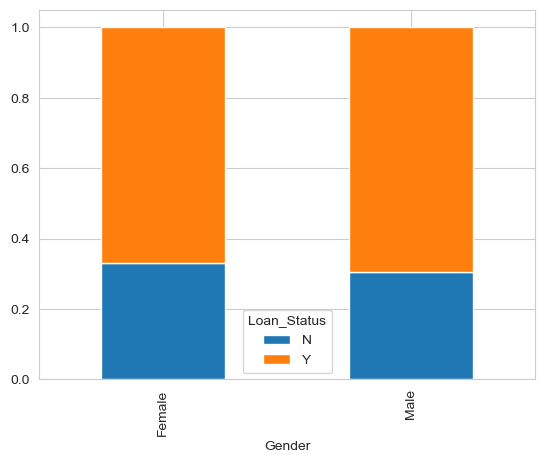

In [18]:
#bivariate analysis
Gender = pd.crosstab(test['Gender'], test['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,)

plt.show()

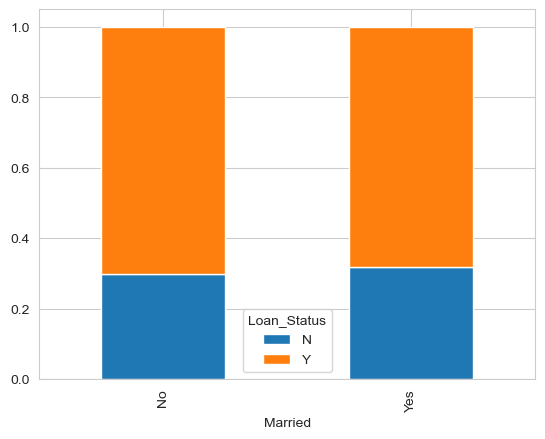

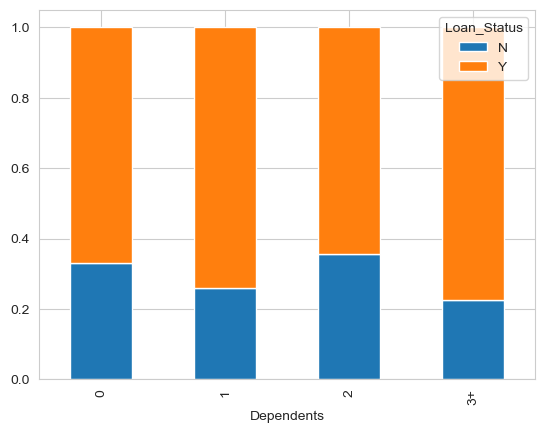

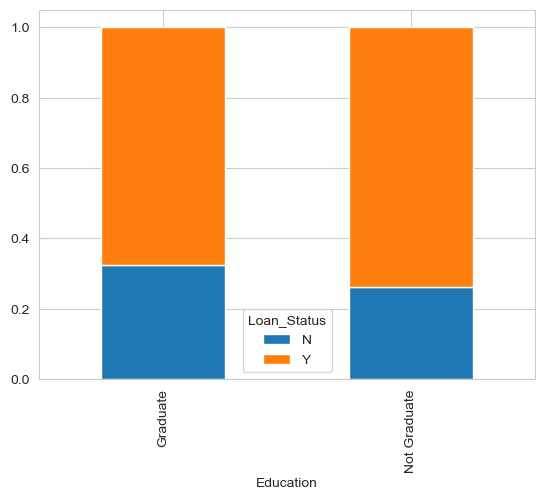

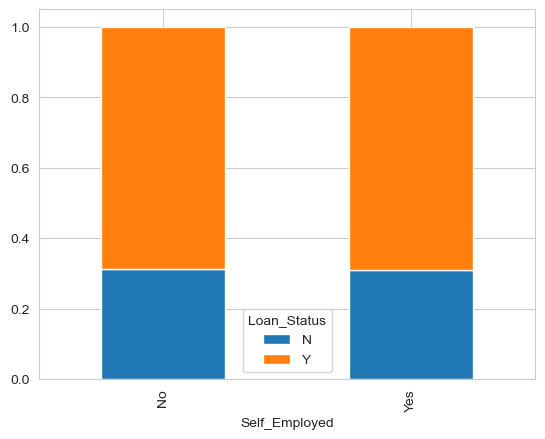

In [19]:
Married = pd.crosstab(train['Married'], test['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'], test['Loan_Status'])
Education=pd.crosstab(train['Education'],test['Loan_Status'])
Self_Employment = pd.crosstab(test['Self_Employed'], test["Loan_Status"])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,)
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,)
plt.show()

Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,)
plt.show()

Self_Employment.div(Self_Employment.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,)
plt.show()

In [20]:
Credit_History = pd.crosstab(test['Credit_History'], test['Loan_Status'])

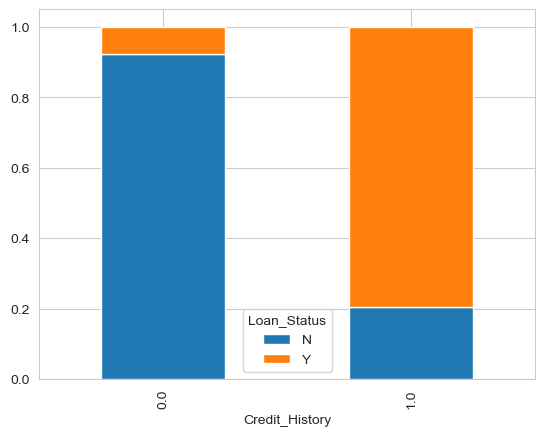

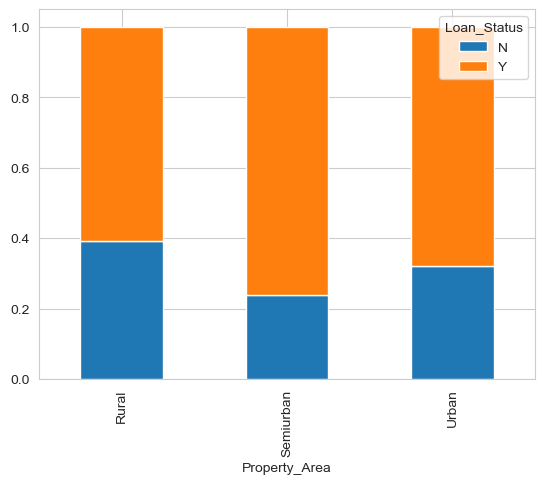

In [23]:
Property_Area = pd.crosstab(test['Property_Area'], test['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.show()

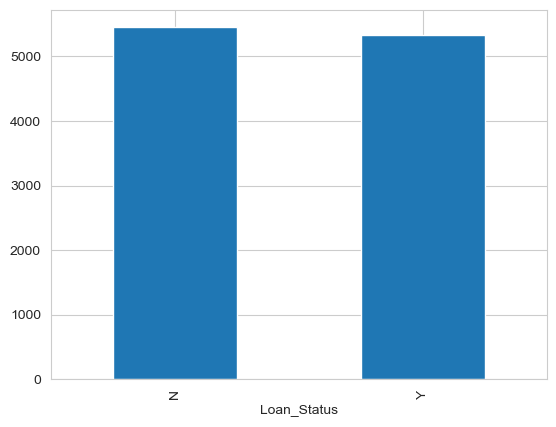

In [26]:
test.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.show()

In [28]:
bins=[0, 2500, 4000, 6000, 81000]
group=['Low', 'Average', 'High', 'Very high']
test['Income_bin'] = pd.cut(test['ApplicantIncome'], bins, labels=group)

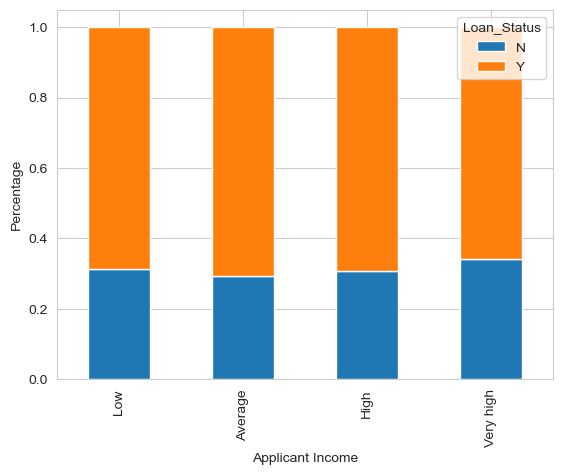

In [30]:
Income_bin = pd.crosstab(test['Income_bin'], test['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Applicant Income')
p=plt.ylabel('Percentage')
plt.show()

<AxesSubplot:xlabel='Coapplicant_Income_bin'>

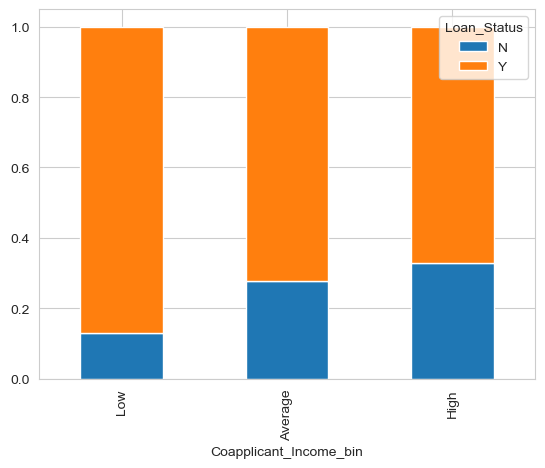

In [32]:
bins=[0, 1000, 3000, 42000]
group=['Low', 'Average', 'High']
test['Coapplicant_Income_bin']=pd.cut(test['CoapplicantIncome'], bins, labels=group)
Coapplicant_Income_bin=pd.crosstab(test['Coapplicant_Income_bin'], test['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

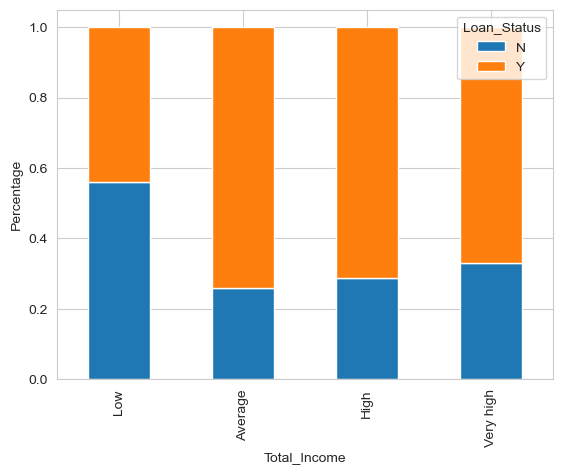

In [34]:
test['Total_Income'] = test['ApplicantIncome'] + test["CoapplicantIncome"]
bins=[0, 2500, 4000, 6000, 81000]
group=['Low', 'Average', 'High', 'Very high']
test['Total_Income_bin']= pd.cut(test["Total_Income"], bins, labels=group)
Total_Income_bin =pd.crosstab(test['Total_Income_bin'], test['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Total_Income')
p=plt.ylabel('Percentage')
plt.show()

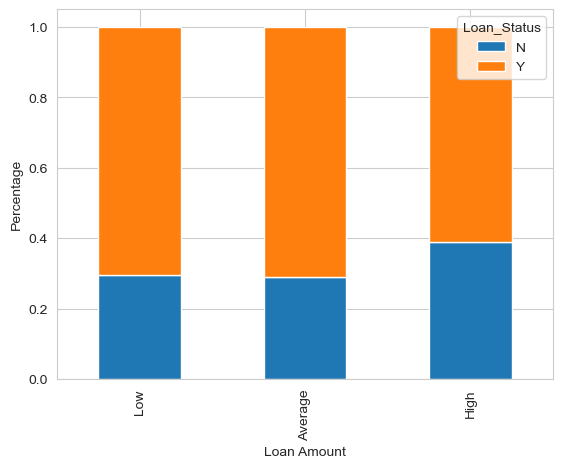

In [36]:
bins=[0, 100, 200, 700]
group=['Low','Average','High']
test['LoanAmount_bin']=pd.cut(test['LoanAmount'], bins, labels=group)
LoanAmount_bin=pd.crosstab(test['LoanAmount_bin'], test['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Loan Amount')
p=plt.ylabel('Percentage')
plt.show()

In [37]:
test=test.drop(['Income_bin','Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
test['Dependents'].replace('3+', 3, inplace=True)
test['Loan_Status'].replace('N', 0, inplace=True)
test['Loan_Status'].replace('Y', 1, inplace=True)

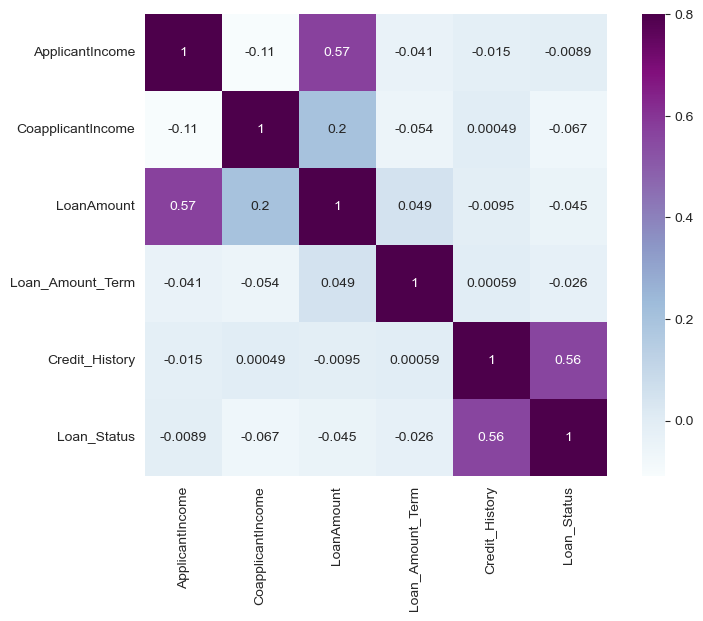

In [40]:
matrix = test.corr()
f, ax =plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax= 0.8, square=True, cmap='BuPu', annot=True)
plt.show()

In [41]:
test.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        33
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           23
Loan_Amount_Term     14
Credit_History       51
Property_Area         0
Loan_Status           0
dtype: int64